In [1]:
from sympy import *
import sympy
import numpy as np
import matplotlib.pyplot as plt
import time 
import shapely
from shapely.geometry import LineString, Point
from sympy import *
from sympy import diff as D


In [2]:

def createvars(n):

    symbols_dict = dict(('x%d'%k, symbols('x%d'%k)) for k in range(n))
    return  symbols_dict

In [3]:
def createrandomp(n):
    

    p=[]
    for i in range(n):
        while True:
            a=np.random.random()
            b=np.random.random()

            if not((a,b) in p):
                p.append((a,b))
                break
    return p

def plot(p):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
def dist(p,i,j):
    return (((p[i][0]-p[j][0])**2)+((p[i][1]-p[j][1])**2))**0.5


def custompath(p,path):
    d=0
    for i in range(0,len(path)):
        d+=dist(p,path[i],path[i-1])
        #d+=dist(p,path[-1], path[0])
    return d
            
def printpath(p,path):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
    x=[p[i][0] for i in path]
    x.append(x[0])
    y=[p[i][1] for i in path]
    y.append(y[0])
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=2)
def intersect (p , i , j, k, l):
    
    A = p[i]
    B = p[j]

    #line 2
    C = p[k]
    D = p[l]

    line1 = LineString([A, B])
    line2 = LineString([C, D])

    int_pt = line1.intersection(line2)

    if int_pt.is_empty: 
        #print('empty')
        return False
    if type(int_pt)==shapely.geometry.linestring.LineString: 
        #print('line',int_pt)
        return True
    elif type(int_pt)==shapely.geometry.point.Point:
        point_of_intersection = int_pt.x, int_pt.y
        
        #print('point')
  
        if point_of_intersection in (A,B,C,D): 
            
            if len((A,B,C,D))==len(set((A,B,C,D))): return True
            else: return False

        else: return True    

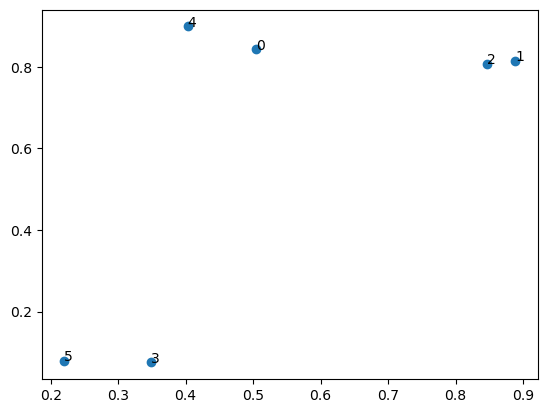

In [307]:
n=6
p=createrandomp(n)
plot(p)

In [308]:
couples=[(i,j) for i in range(n) for j in range(i+1,n)]
distances=[dist(p,i,j) for i in range(n) for j in range(i+1,n)]
N=len(couples)#n*(n-1)/2
symbols_dict=createvars(N)
locals().update(symbols_dict)
vars=list(symbols_dict.values())
err=0.001
xcouples=dict((vars[var],couples[var]) for var in range (len(vars)))

xcouples

{x0: (0, 1),
 x1: (0, 2),
 x2: (0, 3),
 x3: (0, 4),
 x4: (0, 5),
 x5: (1, 2),
 x6: (1, 3),
 x7: (1, 4),
 x8: (1, 5),
 x9: (2, 3),
 x10: (2, 4),
 x11: (2, 5),
 x12: (3, 4),
 x13: (3, 5),
 x14: (4, 5)}

In [309]:
symbols_dict

{'x0': x0,
 'x1': x1,
 'x2': x2,
 'x3': x3,
 'x4': x4,
 'x5': x5,
 'x6': x6,
 'x7': x7,
 'x8': x8,
 'x9': x9,
 'x10': x10,
 'x11': x11,
 'x12': x12,
 'x13': x13,
 'x14': x14}

In [310]:
dict((var,set()) for var in vars)

{x0: set(),
 x1: set(),
 x2: set(),
 x3: set(),
 x4: set(),
 x5: set(),
 x6: set(),
 x7: set(),
 x8: set(),
 x9: set(),
 x10: set(),
 x11: set(),
 x12: set(),
 x13: set(),
 x14: set()}

In [311]:
def intersectioncond():
    prohibited=dict((var,set()) for var in vars)
    for i in range (len(p)):
            for j in range (len(p)):
                if j!=i:
                    for k in range(len(p)):
                        for l in range(len(p)):
                            if k!=l:
                                #print(i,j,k,l)
                                if len(set((i,j,k,l)))>2:
                                    if intersect(p,i,j,k,l):
                                        #print('done')
                                        prohibited[vars[couples.index((min(i,j),max(i,j)))]].add(vars[couples.index((min(k,l),max(k,l)))])
                                        prohibited[vars[couples.index((min(k,l),max(k,l)))]].add(vars[couples.index((min(i,j),max(i,j)))])
    #prohibited=list(set(prohibited))
    return prohibited


In [312]:
intersectioncond()

{x0: {x10},
 x1: set(),
 x2: {x11, x8},
 x3: set(),
 x4: {x12},
 x5: set(),
 x6: set(),
 x7: set(),
 x8: {x12, x2, x9},
 x9: {x8},
 x10: {x0},
 x11: {x12, x2},
 x12: {x11, x4, x8},
 x13: set(),
 x14: set()}

In [313]:
def priority():
    def linecost(dist, numintersection):
        return dist*(numintersection+1)
    intersections=intersectioncond()
    priority=dict()
    for i in range(len(vars)):
        priority[vars[i]]= linecost(distances [i],len(intersections[vars[i]]))
    return priority
    

In [314]:
order= priority()

In [315]:
def prioritylist():
    plist=[]
    order= priority()
    while order:
        m=min(order.values())
        for var in order.keys():
            if order[var]==m:
                break

        print(var,couples[vars.index(var)], order[var])
        plist.append((couples[vars.index(var)], order[var],var))
        del order[var]
    return plist

In [316]:
plist=prioritylist()

x5 (1, 2) 0.043110881755678086
x3 (0, 4) 0.1153348411746518
x13 (3, 5) 0.12874886046287518
x1 (0, 2) 0.3442956166781276
x7 (1, 4) 0.49287025658094424
x0 (0, 1) 0.7715513403099993
x14 (4, 5) 0.8401292670565521
x10 (2, 4) 0.9055058283096806
x6 (1, 3) 0.9158347177670644
x4 (0, 5) 1.6301720771242272
x9 (2, 3) 1.7697795608094093
x2 (0, 3) 2.3509321455935144
x11 (2, 5) 2.8801693758569193
x12 (3, 4) 3.303255465835614
x8 (1, 5) 3.976469294995245


In [317]:
plist

[((1, 2), 0.043110881755678086, x5),
 ((0, 4), 0.1153348411746518, x3),
 ((3, 5), 0.12874886046287518, x13),
 ((0, 2), 0.3442956166781276, x1),
 ((1, 4), 0.49287025658094424, x7),
 ((0, 1), 0.7715513403099993, x0),
 ((4, 5), 0.8401292670565521, x14),
 ((2, 4), 0.9055058283096806, x10),
 ((1, 3), 0.9158347177670644, x6),
 ((0, 5), 1.6301720771242272, x4),
 ((2, 3), 1.7697795608094093, x9),
 ((0, 3), 2.3509321455935144, x2),
 ((2, 5), 2.8801693758569193, x11),
 ((3, 4), 3.303255465835614, x12),
 ((1, 5), 3.976469294995245, x8)]

In [323]:

added=[]
optimalpath=[plist[0][2]]
optimaldistance=0
def cycle(s):#s=[x1,x3,...]
    l=[]
    for i in s:
        l.append(xcouples[i])
    #print(l)
    path=[]
    path.extend(l[0])
    del l[0]
    while(l):
        exists=False
        for i in l:
            

            if path[-1] == i[0]:
                exists=True
                
                path.append(i[1])
                del l[l.index(i)]
                #print(path)
                if path[-1] in path [:-2]: return True
                break

         
            elif path[-1] == i[1]:
                exists=True
                path.append(i[0])
                del l[l.index(i)]
                #print(path)
                if path[-1] in path [:-2]: return True
                break
        #print(path) 
        print(exists)
        if exists==False:
            try : 
                path=[]
                path.extend(l[0])
                del l[0]
            except:
                pass
    return False
def addingtest(couple):#no cycle nor pt repeats 3 times
    if len(optimalpath)==n+1: return False
    if len(optimalpath)==n:
        if added.count(couple[0])==1 and added.count(couple[1])==1:
            return True
    else:
        for x in xcouples.keys():
            if xcouples[x]==couple:
                break
        print(x)    
        testpath=optimalpath+[x]
        if added.count(couple[0])<2 and added.count(couple[1])<2 and cycle(testpath):
            return True
    return False
    
for i in range (len(plist)):
    print(plist[i])
    couple=plist[i][0]
    if  addingtest(couple):#no cycle
        print('added')
        added.append(couple[0])
        added.append(couple[1])
        optimalpath.append(plist[i][2])
        optimaldistance+=plist[i][1]
print(optimalpath)
print(optimaldistance)

((1, 2), 0.043110881755678086, x5)
x5
added
((0, 4), 0.1153348411746518, x3)
x3
added
((3, 5), 0.12874886046287518, x13)
x13
added
((0, 2), 0.3442956166781276, x1)
x1
added
((1, 4), 0.49287025658094424, x7)
x7
added
((0, 1), 0.7715513403099993, x0)
((4, 5), 0.8401292670565521, x14)
((2, 4), 0.9055058283096806, x10)
((1, 3), 0.9158347177670644, x6)
((0, 5), 1.6301720771242272, x4)
((2, 3), 1.7697795608094093, x9)
((0, 3), 2.3509321455935144, x2)
((2, 5), 2.8801693758569193, x11)
((3, 4), 3.303255465835614, x12)
((1, 5), 3.976469294995245, x8)
[x5, x5, x3, x13, x1, x7]
1.124360456652277


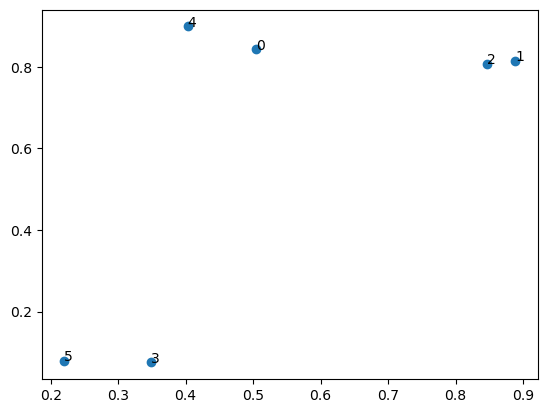

In [324]:
plot(p)

In [325]:
del optimalpath[0]
optimalpath

[x5, x3, x13, x1, x7]

In [326]:
def createl():
    path=1
    for i in optimalpath:
        path*=i
    return [path]
def finalpath(l):
    distances=[]
    paths=[]
    for solution in l:
        if type (solution)==int:
            print('error')
        else:
            road=[]
            for x in solution.args:
                road.append(xcouples[x])
            path=[]
            #print(road)
            path.extend(road[0])
            del road[0]
            #print(road)
            while road:
                test=True
                for i in range (len(road)):
                    #print(i, road[i])
                    if path[-1] in road[i]:
                        test=False
                        if path[-1]==road[i][0]:
                            path.append(road[i][1])

                        else: path.append(road[i][0])
                        del road[i]
                        break
                if test:
                    print('error: point',path[-1],' not existing')
                    break
            #print(path)
            paths.append(path)
            distances.append(custompath(p,path))
    print(distances)

    print(paths)
    mindist= min(distances)
    solution=paths[distances.index(mindist)]
    return solution
l=createl()
path=finalpath(l)

error: point 0  not existing
[0.9956115961894016]
[[0, 2, 1, 4, 0]]


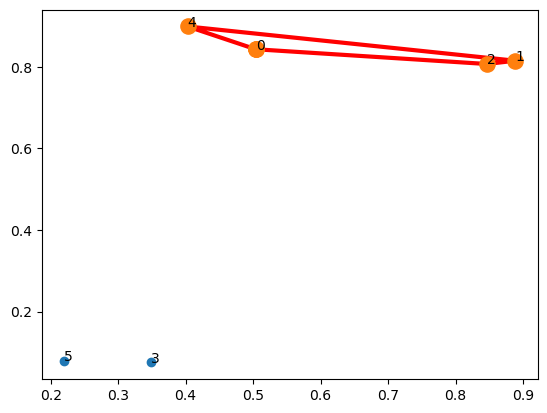

In [327]:
printpath(p,path)

In [266]:
custompath(p,path) #algo attempt

2.519971737292008